In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./process_data/dining area.xlsx")
df.head()

,start_time,end_time,temperature,luminosity,humidity,motion
0,2022-05-01 00:00:00,2022-05-01 00:30:00,0.376901,0.087579,0.475664,0.0
1,2022-05-01 00:30:00,2022-05-01 01:00:00,0.460366,0.085515,0.492180,0.0
2,2022-05-01 01:00:00,2022-05-01 01:30:00,0.479522,0.085102,0.502993,0.0
3,2022-05-01 01:30:00,2022-05-01 02:00:00,0.464881,0.085515,0.509424,0.0
4,2022-05-01 02:00:00,2022-05-01 02:30:00,0.446955,0.085928,0.512793,0.0


In [3]:
datatypes = ["temperature", "luminosity", "humidity", "motion"]

In [4]:
morning_start = pd.to_datetime("04:30:00").time()
morning_end = pd.to_datetime("12:00:00").time()

afternoon_start = pd.to_datetime("12:00:00").time()
afternoon_end = pd.to_datetime("20:30:00").time()

In [5]:
dates = df["start_time"].dt.date.unique()

df_data = {
    "date": [],
    "time": [],
    "temperature": [],
    "luminosity": [],
    "humidity": [],
    "motion": []
}

In [6]:
for date in dates:
    rows = df[
        df["start_time"].dt.date == date
    ]

    """---------------MORNING TIME---------------"""
    morning_df = rows[
        (rows["start_time"].dt.time >= morning_start) &
        (rows["start_time"].dt.time <= morning_end) &
        (rows["end_time"].dt.time <= morning_end)
    ].sort_values("start_time")

    for datatype in ["temperature", "luminosity", "humidity", "motion"]:
        df_data[datatype].append(
            np.array(
                morning_df[datatype].tolist()
            )
        )

    df_data["date"].append(date)
    df_data["time"].append(f"{morning_start} - {morning_end}")

    """---------------AFTERNOON TIME--------------"""
    afternoon_df = rows[
        (rows["start_time"].dt.time >= afternoon_start) &
        (rows["start_time"].dt.time <= afternoon_end) &
        (rows["end_time"].dt.time <= afternoon_end)
    ]

    for datatype in ["temperature", "luminosity", "humidity", "motion"]:
        df_data[datatype].append(
            np.array(
                afternoon_df[datatype].tolist()
            )
        )

    df_data["date"].append(date)
    df_data["time"].append(f"{afternoon_start} - {afternoon_end}")

In [7]:
time_df = pd.DataFrame(df_data)
time_df.head(10)

,date,time,temperature,luminosity,humidity,motion
0,2022-05-01,04:30:00 - 12:00:00,"[0.4488278179454802, 0.4322391184742269, 0.446...","[0.09548947922260698, 0.1067274020707629, 0.11...","[0.5218303180861802, 0.523182339754683, 0.5218...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004..."
1,2022-05-01,12:00:00 - 20:30:00,"[0.4836997128940765, 0.561246941662826, 0.6187...","[0.08575832090123524, 0.1135251771742941, 0.14...","[0.3958119509127495, 0.3691622782594428, 0.348...","[0.0, 0.007334963325183374, 0.0, 0.0, 0.004889..."
2,2022-05-02,04:30:00 - 12:00:00,"[0.4347363618052108, 0.4381254558831656, 0.429...","[0.09692993372325114, 0.107278961681034, 0.119...","[0.4947061198537466, 0.4970185033031632, 0.494...","[0.0, 0.0, 0.002444987775061125, 0.00244498777..."
3,2022-05-02,12:00:00 - 20:30:00,"[0.555851540634401, 0.5119717796295798, 0.5267...","[0.5874465983315247, 0.4640764368641033, 0.287...","[0.3481476146050616, 0.3391445955916446, 0.336...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00488997..."
4,2022-05-03,04:30:00 - 12:00:00,"[0.4395969892025127, 0.436899084556749, 0.4492...","[0.09976575087654435, 0.1130197783326956, 0.12...","[0.5636458320343667, 0.565324442016578, 0.5590...","[0.007334963325183374, 0.0, 0.0048899755501222..."
5,2022-05-03,12:00:00 - 20:30:00,"[0.493421018721568, 0.5451491785720866, 0.5004...","[0.3859527121530628, 0.3729807889493887, 0.311...","[0.3952908104243336, 0.3977712441710954, 0.397...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0024449877750..."
6,2022-05-04,04:30:00 - 12:00:00,"[0.4382592130820562, 0.4270706606977921, 0.426...","[0.0918628147064196, 0.1021953703890057, 0.116...","[0.596265762435231, 0.5941372830847959, 0.5891...","[0.0, 0.0, 0.004889975550122249, 0.0, 0.004889..."
7,2022-05-04,12:00:00 - 20:30:00,"[0.5268213293179296, 0.5272693470398143, 0.514...","[0.6309745427304361, 0.4260044573231205, 0.139...","[0.3977712441710954, 0.3886474049917753, 0.385...","[0.002444987775061125, 0.0, 0.0, 0.00488997555..."
8,2022-05-05,04:30:00 - 12:00:00,"[0.4333093801969022, 0.4329050976598512, 0.438...","[0.08553654178526857, 0.08646967499107035, 0.0...","[0.5910304112118843, 0.5875729573612951, 0.596...","[0.002444987775061125, 0.004889975550122249, 0..."
9,2022-05-05,12:00:00 - 20:30:00,"[0.4419055639473469, 0.4434766113978791, 0.452...","[0.1268492734186389, 0.1358441751928196, 0.133...","[0.6149088866639406, 0.6086716698267395, 0.607...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004889975550122249..."


In [8]:
final_df = {
    "date": [],
    "time": [],
    "data": []
}

In [9]:
for index, row in time_df.iterrows():
    data = row[datatypes[0]]
    
    for i in range(1, len(datatypes)):
        datatype = datatypes[i]

        data = np.vstack((data, row[datatype]))
        data = torch.from_numpy(data)
        data = torch.squeeze(data)

    final_df["date"].append(row["date"])
    final_df["time"].append(row["time"])
    final_df["data"].append(data)

In [10]:
final_df = pd.DataFrame(final_df)
final_df.head(5)

,date,time,data
0,2022-05-01,04:30:00 - 12:00:00,"[[tensor(0.4488, dtype=torch.float64), tensor(..."
1,2022-05-01,12:00:00 - 20:30:00,"[[tensor(0.4837, dtype=torch.float64), tensor(..."
2,2022-05-02,04:30:00 - 12:00:00,"[[tensor(0.4347, dtype=torch.float64), tensor(..."
3,2022-05-02,12:00:00 - 20:30:00,"[[tensor(0.5559, dtype=torch.float64), tensor(..."
4,2022-05-03,04:30:00 - 12:00:00,"[[tensor(0.4396, dtype=torch.float64), tensor(..."


In [11]:
final_df.loc[0]["data"]

tensor([[0.4488, 0.4322, 0.4462, 0.4465, 0.4326, 0.4227, 0.4250, 0.4341, 0.4250,
         0.4356, 0.4507, 0.4513, 0.4787, 0.5554, 0.5692],
        [0.0955, 0.1067, 0.1168, 0.1232, 0.1281, 0.1355, 0.1494, 0.1742, 0.2133,
         0.2698, 0.3389, 0.3827, 0.3553, 0.2376, 0.1186],
        [0.5218, 0.5232, 0.5218, 0.5165, 0.5094, 0.5031, 0.4970, 0.4905, 0.4837,
         0.4775, 0.4722, 0.4677, 0.4598, 0.4446, 0.4226],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0049,
         0.0049, 0.0024, 0.0024, 0.0049, 0.0098, 0.0024]], dtype=torch.float64)

In [12]:
final_df.loc[0]["data"].shape

torch.Size([4, 15])

In [13]:
preprocessed_df = final_df.drop(
    index=final_df[
        final_df["data"].apply(lambda x: x.shape != torch.Size([4, 15]))
    ].index
).reset_index(drop=True)

preprocessed_df.head(10)

,date,time,data
0,2022-05-01,04:30:00 - 12:00:00,"[[tensor(0.4488, dtype=torch.float64), tensor(..."
1,2022-05-02,04:30:00 - 12:00:00,"[[tensor(0.4347, dtype=torch.float64), tensor(..."
2,2022-05-03,04:30:00 - 12:00:00,"[[tensor(0.4396, dtype=torch.float64), tensor(..."
3,2022-05-04,04:30:00 - 12:00:00,"[[tensor(0.4383, dtype=torch.float64), tensor(..."
4,2022-05-05,04:30:00 - 12:00:00,"[[tensor(0.4333, dtype=torch.float64), tensor(..."
5,2022-05-06,04:30:00 - 12:00:00,"[[tensor(0.4542, dtype=torch.float64), tensor(..."
6,2022-05-07,04:30:00 - 12:00:00,"[[tensor(0.4089, dtype=torch.float64), tensor(..."
7,2022-05-08,04:30:00 - 12:00:00,"[[tensor(0.4247, dtype=torch.float64), tensor(..."
8,2022-05-09,04:30:00 - 12:00:00,"[[tensor(0.4387, dtype=torch.float64), tensor(..."
9,2022-05-10,04:30:00 - 12:00:00,"[[tensor(0.4556, dtype=torch.float64), tensor(..."


In [14]:
data = torch.stack(
    tuple(preprocessed_df["data"])
)

In [15]:
data.shape

torch.Size([438, 4, 15])

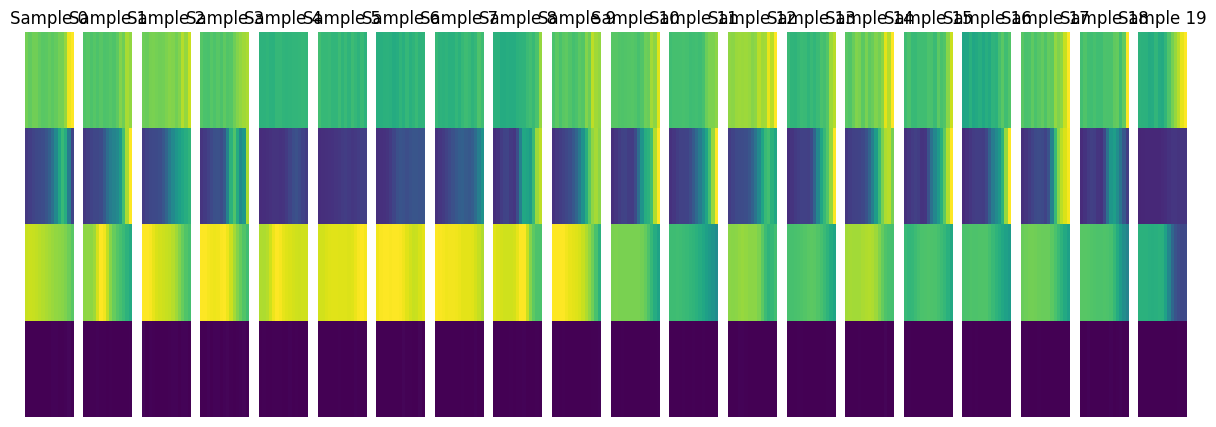

In [16]:
num_samples = 20  # Số lượng ma trận muốn hiển thị
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    ax = axes[i]
    ax.imshow(data[i], cmap='viridis', aspect='auto')
    ax.set_title(f"Sample {i}")
    ax.axis("off")

plt.show()

In [17]:
import plotly.graph_objects as go
import numpy as np

# Chuyển tensor sang numpy và lấy một số lượng nhỏ để trực quan hóa
num_layers = 20  # Số lớp cần hiển thị (tăng lên nếu muốn hình hộp lớn hơn)
data_np = data[:num_layers].numpy()

# Tạo hình hộp bằng cách xếp từng heatmap lên trục Z
fig = go.Figure()

for i in range(num_layers):
    fig.add_trace(
        go.Surface(
            z=np.full((4, 5), i),  # Đặt layer ở vị trí z = i
            x=np.arange(5),  # Trục X (5 cột)
            y=np.arange(4),  # Trục Y (4 hàng)
            surfacecolor=data_np[i],  # Giá trị màu từ ma trận 4x5
            colorscale="viridis",  # Bảng màu
            showscale=True  # Hiển thị thang đo
        )
    )

# Cấu hình layout để dễ quan sát hơn
fig.update_layout(
    title="Stacked Heatmaps forming a 3D Cube",
    scene=dict(
        xaxis_title="Columns (5)",
        yaxis_title="Rows (4)",
        zaxis_title="Time steps",
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Mở rộng góc nhìn
        ),
    ),
    width=1000,  # Mở rộng plot
    height=800
)

fig.show()